In [1]:
import MDAnalysis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import mdtraj as md
from FRETpredict.FRET import FRETpredict
import MDAnalysis.transformations as trans

In [2]:
t = md.load_xtc('FRET/pp11dyes_amber99sbwx1.15_box6.5_alt_npt_s1_whole.xtc',
                'FRET/pp11dyes_amber99sbw_k2_box6.5_vac.pdb')
t.atom_slice(t.top.select('resid 1 to 12'), inplace=True)
top = md.Topology()
chain = top.add_chain()
for residue in t.top.residues:
    res = top.add_residue(residue.name, chain, resSeq=residue.index)
    for atom in residue.atoms:
        top.add_atom(atom.name, element=atom.element, residue=res)
allatom = md.Trajectory(t.xyz, top, t.time, np.full((t.n_frames,3),10), np.full((t.n_frames,3),90))
allatom = allatom.center_coordinates()
allatom.xyz += allatom.unitcell_lengths[0,0]/2
allatom = allatom.superpose(allatom, frame=0)
allatom[::1000].save_dcd('pp11.dcd')
allatom[0].save_pdb('pp11.pdb')

u = MDAnalysis.Universe('pp11.pdb',
                        'pp11.dcd')

/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM     81  N   GLY X   1       0.000   0.000   0.000  0.00  0.00              , ATOM     80  O   NT59X   1       0.030  -2.170  -0.000  0.00  0.00              )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


In [3]:
len(u.trajectory)

316

In [4]:
cutoffs = np.array([50,75,100,150,200])
cutoffs2 = np.array([20,25,30,35])

In [19]:
for cutoff in cutoffs:
    FRET = FRETpredict(u, residues = [1,12], temperature = 298, 
                libname_1='Alexa 488 {:d}cutoff 3step'.format(cutoff),
                libname_2='Alexa 594 {:d}cutoff 3step'.format(cutoff))
    FRET.run(output_prefix='pp11/old{:d}pp11_res'.format(cutoff))

/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


316
           Average     Error
k2        0.624952  0.025857
Estatic   0.613910  0.052853
Edynamic  0.768199  0.052442


/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


316
           Average     Error
k2        0.665686  0.067916
Estatic   0.660137  0.050988
Edynamic  0.822057  0.043080


/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


316
           Average     Error
k2        0.730450  0.151781
Estatic   0.633026  0.061730
Edynamic  0.807866  0.058079


/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


278
           Average     Error
k2        1.219879  0.308374
Estatic   0.814726  0.054915
Edynamic  0.939760  0.015842


/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


230
           Average     Error
k2        1.621861  0.597447
Estatic   0.889792  0.083284
Edynamic  0.946237  0.023857


In [6]:
for cutoff in cutoffs2:
    FRET = FRETpredict(u, residues = [1,12], temperature = 298, 
                libname_1='A48 C1R {:d}'.format(cutoff),
                libname_2='A59 C1R {:d}'.format(cutoff))
    FRET.run(output_prefix='pp11/{:d}pp11_o_res'.format(cutoff))

316
           Average     Error
k2        0.665986  0.054704
Estatic   0.660040  0.046392
Edynamic  0.808249  0.042134
316
           Average     Error
k2        0.664177  0.093053
Estatic   0.675938  0.046385
Edynamic  0.826503  0.036314
316
           Average     Error
k2        0.641495  0.133778
Estatic   0.698466  0.047532
Edynamic  0.841345  0.035494
316
           Average     Error
k2        0.697223  0.129416
Estatic   0.691295  0.078509
Edynamic  0.824253  0.068173


In [10]:
k2 = np.empty(0)
Estatic = np.empty(0)
Edynamic = np.empty(0)
k2_err = np.empty(0)
Estatic_err = np.empty(0)
Edynamic_err = np.empty(0)
for cutoff in cutoffs:
    df = pd.read_pickle('pp11/old{:d}pp11_res-weightedAvgStd-{:d}-{:d}.dat'.format(cutoff,1,12))
    k2 = np.append(k2,df.loc['k2','Average'])
    Estatic = np.append(Estatic,df.loc['Estatic','Average'])
    Edynamic = np.append(Edynamic,df.loc['Edynamic','Average'])
    k2_err = np.append(k2_err,df.loc['k2','Error'])
    Estatic_err = np.append(Estatic_err,df.loc['Estatic','Error'])
    Edynamic_err = np.append(Edynamic_err,df.loc['Edynamic','Error'])

In [7]:
k2_new = np.empty(0)
Estatic_new = np.empty(0)
Edynamic_new = np.empty(0)
k2_new_err = np.empty(0)
Estatic_new_err = np.empty(0)
Edynamic_new_err = np.empty(0)
for cutoff in cutoffs2:
    df = pd.read_pickle('pp11/{:d}pp11_o_res-weightedAvgStd-{:d}-{:d}.dat'.format(cutoff,1,12))
    k2_new = np.append(k2_new,df.loc['k2','Average'])
    Estatic_new = np.append(Estatic_new,df.loc['Estatic','Average'])
    Edynamic_new = np.append(Edynamic_new,df.loc['Edynamic','Average'])
    k2_new_err = np.append(k2_new_err,df.loc['k2','Error'])
    Estatic_new_err = np.append(Estatic_new_err,df.loc['Estatic','Error'])
    Edynamic_new_err = np.append(Edynamic_new_err,df.loc['Edynamic','Error'])

In [8]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 9})

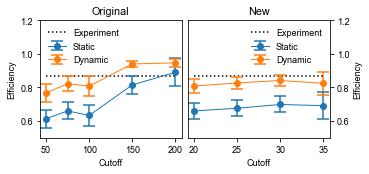

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

ax1.errorbar(x=cutoffs, y=Estatic, yerr=Estatic_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='Static')
ax1.errorbar(x=cutoffs, y=Edynamic, yerr=Edynamic_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='Dynamic')

ax2.errorbar(x=cutoffs2, y=Estatic_new, yerr=Estatic_new_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='Static',color=plt.cm.tab10(0))
ax2.errorbar(x=cutoffs2, y=Edynamic_new, yerr=Edynamic_new_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='Dynamic',color=plt.cm.tab10(1))

ax1.hlines(0.87,cutoffs.min(),cutoffs.max(),ls=':',label='Experiment')
ax2.hlines(0.87,cutoffs2.min(),cutoffs2.max(),ls=':',label='Experiment')


for ax in [ax1,ax2]:
    ax.set_ylabel('Efficiency')
    ax.set_xlabel('Cutoff')
    ax.legend(frameon=False)
    ax.set_ylim(.5,1.2)
    
ax1.set_title('Original')   
ax2.set_title('New')
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('pp11/E.pdf')

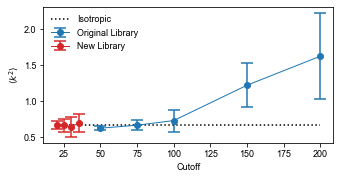

In [13]:
plt.figure(figsize=(5.2,2.5))

plt.errorbar(x=cutoffs, y=k2, yerr=k2_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='Original Library')
plt.errorbar(x=cutoffs2, y=k2_new, yerr=k2_new_err, lw=1, marker='o', 
             ms=6, elinewidth=1.5, capsize=6, capthick=1.5, label='New Library',color=plt.cm.tab10(3))
plt.hlines(2/3,cutoffs2.min(),cutoffs.max(),ls=':',label='Isotropic')
plt.ylabel(r'$\langle k^2 \rangle$')
plt.xlabel('Cutoff')
plt.legend(frameon=False)
plt.savefig('pp11/k2.pdf')

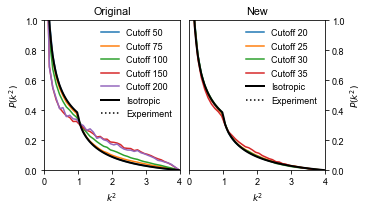

In [15]:
def pk2(x):
    y1 = 1/2/np.sqrt(3*x[x<1])*np.log(2+np.sqrt(3))
    y2 = 1/2/np.sqrt(3*x[x>=1])*(np.log(2+np.sqrt(3))-np.log(np.sqrt(x[x>=1])+np.sqrt(x[x>=1]-1)))
    return np.append(y1,y2)

fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,3))


for cutoff in cutoffs:
    x,y = np.loadtxt('pp11/old{:d}pp11_res-allk2-{:d}-{:d}.dat'.format(cutoff,1,12),unpack=True)
    ax1.plot(x,y,label='Cutoff {:d}'.format(cutoff))
    
for cutoff in cutoffs2:
    x,y = np.loadtxt('pp11/{:d}pp11_o_res-allk2-{:d}-{:d}.dat'.format(cutoff,1,12),unpack=True)
    ax2.plot(x,y,label='Cutoff {:d}'.format(cutoff))
    
    
for ax in [ax1,ax2]:
    ax.plot(np.linspace(1e-5,4,100),pk2(np.linspace(1e-5,4,100)),lw=2,color='k',label='Isotropic')
    ax.hlines(0.87,cutoffs.min(),cutoffs.max(),ls=':',label='Experiment')
    ax.set_ylabel(r'$P(k^2)$')
    ax.set_xlabel('$k^2$')
    ax.legend(frameon=False)
    ax.set_ylim(0,1)
    ax.set_xlim(0,4)

ax1.set_title('Original')   
ax2.set_title('New')
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('pp11/Pk2.pdf')